In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')


In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:

# Handling missing values in the 'salary' column
df['salary'] = df['salary'].fillna(df['salary'].median())



In [ ]:
# Encode categorical features using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])



In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,265000.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [ ]:
# Split the data into features (X) and labels (y)
features = df.drop('status', axis=1)
labels = df['status']

# Split the data into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)



In [ ]:
# Detect and remove outliers using Z-score method
selected_columns = ['hsc_p', 'degree_p', 'salary']
z_scores = np.abs(stats.zscore(features_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
features_train = features_train.drop(features_train.index[outlier_indices])
labels_train = labels_train.drop(labels_train.index[outlier_indices])



In [ ]:
# Initialize classifiers
random_forest = RandomForestClassifier(random_state=0, class_weight='balanced')
svm_classifier = SVC(random_state=0, class_weight='balanced', probability=True)
logistic_regression = LogisticRegression(random_state=0, class_weight='balanced')

# List of classifiers and their names
classifiers = [(random_forest, 'Random Forest'), (svm_classifier, 'SVM'), (logistic_regression, 'Logistic Regression')]

# Dictionary to store accuracy scores
accuracy_scores = {}



In [ ]:
# Train and evaluate each model
for clf, clf_name in classifiers:
    clf.fit(features_train, labels_train)
    accuracy = clf.score(features_test, labels_test)
    accuracy_scores[clf_name] = accuracy

# Print accuracy scores
for clf_name, accuracy in accuracy_scores.items():
    print(f'{clf_name} Accuracy: {round(accuracy * 100, 2)}%')



Random Forest Accuracy: 86.05%
SVM Accuracy: 39.53%
Logistic Regression Accuracy: 67.44%


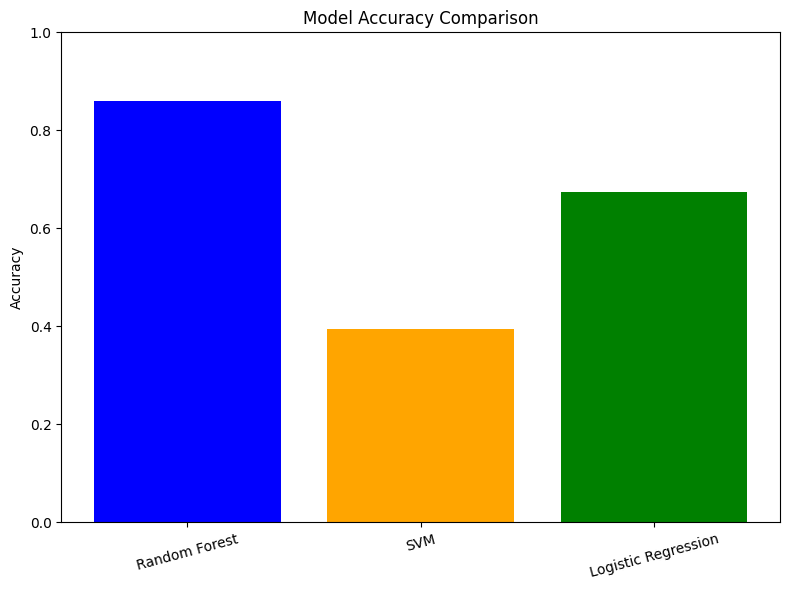

In [ ]:
# Plotting bar graph to compare accuracy
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
